In [46]:
# мои библиотеки
from layer_summation_method.CreateModels import *
from layer_summation_method.Methods import *

import numpy as np
from matplotlib import pyplot as plt

## Примеры

### Ленточный фундамент

In [47]:
"""
Входные данные
"""
counts_ige = 3
dict_ige = {}
dict_soil = {}
for i in range(counts_ige):
    dict_ige[f"ige{i+1}"] = 0
    dict_soil[f"soil{i}"] = f"ige{i+1}"


E = [25e6,
     25e6,
     25e6
     ]
gamma = [18e3,
         18e3,
         18e3
         ]
z_soils = [50,
           30,
           20,
           0
           ]
water_soils = [False,
               False,
               False
               ]

P = 500e3
H_found = 0
f_length = 2
f_width = 2

осадка 0.0517157888
Отметка и номер слоя: (35.6, 0)


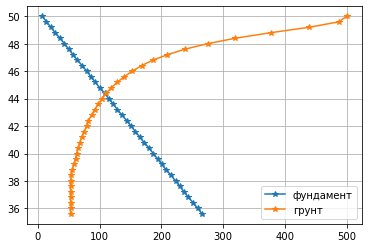

In [48]:
"""
Создание материалов
"""
for i, ige in enumerate(dict_ige):
    dict_ige[ige] = CreateMaterial()
    dict_ige[ige].change = ("E", E[i])
    dict_ige[ige].change = ("gamma", gamma[i])

"""
Создание скважины
"""
Borehole_1 = CreateBorehole(0, 0)

"""
Создание слоев в скважине
"""
for i, soil in enumerate(dict_soil):
    Borehole_1.createSoil(bot=z_soils[i + 1],
                          water=water_soils[i],
                          material=dict_ige[dict_soil[soil]]
                          )
Borehole_1.change[0][0].change["Top"] = z_soils[0]

"""
Создание нагрузки и плиты
"""
load_1 = CreateLoad(Type="P", load=P)
plate_1 = CreatePlate(FL=z_soils[0]-H_found, length=f_length, width=f_width)
plate_1.change["Load"] = load_1

"""
Вычисление напряжений
"""
Mps = LayerSumMethod(Borehole_1,
                     plate_1,
                     load_1,
                     type_found="ленточный",
                     path_alpha = r".\layer_summation_method\alpha_table.txt"
                     )
Mps.calculation()

print(f"осадка {Mps.Output()[0]}")
print(f"Отметка и номер слоя: {Mps.comparison()}")

result_dict = Mps.Output()[1]

depth = []
sigx = []
sigy = []

for key, item in result_dict.items():
    _, x, y = item
    sigx.append(int(x/1000))
    sigy.append(int(y/1000))
    depth.append(float(key))


plt.plot(sigx, depth, "-*", label="фундамент")
plt.plot(sigy, depth, "-*", label="грунт")
plt.grid(True)
plt.legend()
plt.show()

### Определение осадки для объектов Т1, Т2.
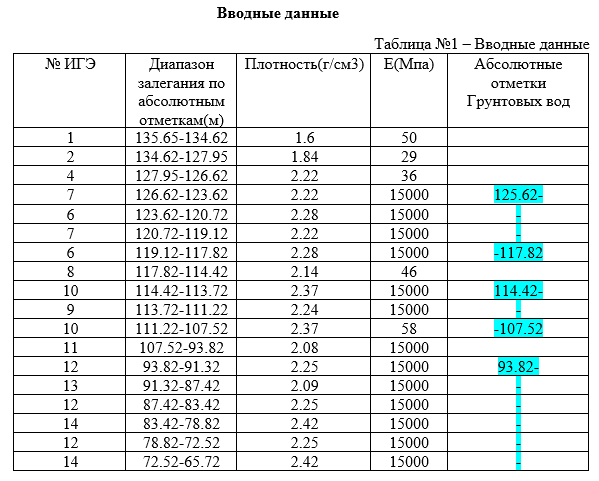
     
    ZP=127.95  Абсолютная отметка уровня фундамента
    l=51.525     длина фундамента в метрах, для прямоугольного фундамента  
    b=42.71     ширина фундамента в метрах  
    P=430152   в Па  


In [49]:
"""
Входные данные
"""
counts_ige = 18
dict_ige = {}
dict_soil = {}
for i in range(counts_ige):
    dict_ige[f"ige{i+1}"] = 0
    dict_soil[f"soil{i}"] = f"ige{i+1}"

f_length = 51.525    #длина фундамента в метрах, для прямоугольного фундамента
f_width = 42.71    #ширина фундамента в метрах
P = 430152  #в па
z_soils = [135.65,134.62,127.95,126.62,123.62,120.72,119.12,117.82,114.42,113.72,111.22,107.52,93.82,91.32,87.42,83.42,78.82,72.52,65.72]  #в метрах
gamma = np.array([1.6,1.84,2.22,2.22,2.28,2.22,2.28,2.14,2.37,2.24,2.37,2.08,2.25,2.09,2.25,2.42,2.25,2.42]) * 9807
E = np.array([50,29,36,15000,15000,15000,15000,46,15000,15000,15000,58,15000,15000,15000,15000,15000,15000]) * 1e6
water_soils = [False,
               False,
               False,
               [125.62, 123.62],
               True,
               True,
               True,
               False,
               True,
               True,
               True,
               False,
               True,
               True,
               True,
               True,
               True,
               True
               ]
H_found = 7.7  #Отметка фунд

осадка 0.025108238599754012
Отметка и номер слоя: (99.52, 11)


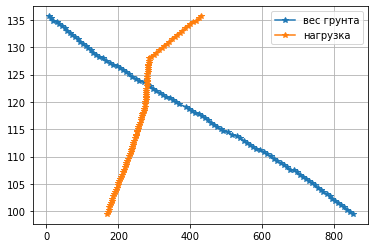

In [51]:
"""
Создание материалов
"""
for i, ige in enumerate(dict_ige):
    dict_ige[ige] = CreateMaterial()
    dict_ige[ige].change = ("E", E[i])
    dict_ige[ige].change = ("gamma", gamma[i])

"""
Создание скважины
"""
Borehole_1 = CreateBorehole(0, 0)

"""
Создание слоев в скважине
"""
for i, soil in enumerate(dict_soil):
    Borehole_1.createSoil(bot=z_soils[i + 1],
                          water=water_soils[i],
                          material=dict_ige[dict_soil[soil]]
                          )
Borehole_1.change[0][0].change["Top"] = z_soils[0]

"""
Создание нагрузки и плиты
"""
load_1 = CreateLoad(Type="P", load=P)
plate_1 = CreatePlate(FL=z_soils[0]-H_found, length=f_length, width=f_width)
plate_1.change["Load"] = load_1

"""
Вычисление напряжений
"""
Mps = LayerSumMethod(Borehole_1,
                     plate_1,
                     load_1,
                     path_alpha = r".\layer_summation_method\alpha_table.txt"
                     )
Mps.calculation()




print(f"осадка {Mps.Output()[0]}")
print(f"Отметка и номер слоя: {Mps.comparison()}")

result_dict = Mps.Output()[1]

depth = []
sigx = []
sigy = []

for key, item in result_dict.items():
    _, x, y = item
    sigx.append(int(x/1000))
    sigy.append(int(y/1000))
    depth.append(float(key))


plt.plot(sigx, depth, "-*", label="вес грунта")
plt.plot(sigy, depth, "-*", label="нагрузка")
plt.plot([0, sigx[-1]], [z_soils[0] - H_found, z_soils[0] - H_found], "--")
plt.plot([0, sigx[-1]], [z_soils[0] - H_found, z_soils[0] - H_found], "--")
plt.grid(True)
plt.legend()
plt.show()